# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df0.head(3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


In [4]:
df1.head(3)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 5 columns):

 #   Column   Non-Null Count   Dtype  

---  ------   --------------   -----  

 0   id       100000 non-null  object 

 1   f0       100000 non-null  float64

 2   f1       100000 non-null  float64

 3   f2       100000 non-null  float64

 4   product  100000 non-null  float64

dtypes: float64(4), object(1)

memory usage: 3.8+ MB


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 5 columns):

 #   Column   Non-Null Count   Dtype  

---  ------   --------------   -----  

 0   id       100000 non-null  object 

 1   f0       100000 non-null  float64

 2   f1       100000 non-null  float64

 3   f2       100000 non-null  float64

 4   product  100000 non-null  float64

dtypes: float64(4), object(1)

memory usage: 3.8+ MB


In [7]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 5 columns):

 #   Column   Non-Null Count   Dtype  

---  ------   --------------   -----  

 0   id       100000 non-null  object 

 1   f0       100000 non-null  float64

 2   f1       100000 non-null  float64

 3   f2       100000 non-null  float64

 4   product  100000 non-null  float64

dtypes: float64(4), object(1)

memory usage: 3.8+ MB


In [8]:
print(df0.duplicated().sum())
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0

0

0


In [9]:
df0 = df0.drop('id', axis=1)
df1 = df1.drop('id', axis=1)
df2 = df2.drop('id', axis=1)

df0.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

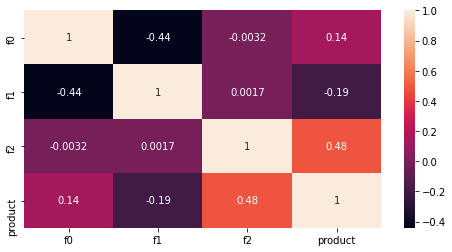

In [10]:
plt.figure(figsize = (8,4))
data = sns.heatmap(df0.corr(), annot=True)

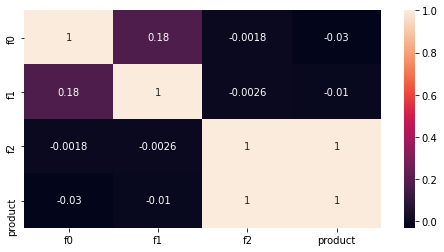

In [11]:
plt.figure(figsize = (8,4))
data = sns.heatmap(df1.corr(), annot=True)

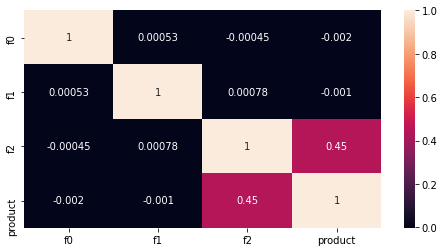

In [12]:
plt.figure(figsize = (8,4))
data = sns.heatmap(df2.corr(), annot=True)

### Вывод

Можно обнаружить, что модель для датафрейма первого региона будет обучаться лучше, т.к. там прослеживаются сильные корреляции.

## Обучение и проверка модели

### Деление данных на обучающую и валидационную модель

In [13]:
def split_sample(dataframe):
    target = dataframe['product']
    features = dataframe.drop('product', axis=1)

    # Поделим на обучающую, валидационную и тестовую в соотношении 3:1
    features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                               test_size=.25,
                                                                               random_state=12345)
    
    return features_train, features_test, target_train, target_test

In [14]:
features_train0, features_test0, target_train0, target_test0 = split_sample(df0)

print(features_train0.shape)
print(features_test0.shape)

(75000, 3)

(25000, 3)


In [15]:
features_train1, features_test1, target_train1, target_test1 = split_sample(df1)

print(features_train1.shape)
print(features_test1.shape)

(75000, 3)

(25000, 3)


In [16]:
features_train2, features_test2, target_train2, target_test2 = split_sample(df2)

print(features_train2.shape)
print(features_test2.shape)

(75000, 3)

(25000, 3)


### Обучение модели и предсказание на валидационной выборке

In [45]:
def create_model(features_train, target_train, features_test, target_test):
    model = LinearRegression()

    model.fit(features_train, target_train)
    predictions_test = model.predict(features_test)

    result = mean_squared_error(target_test, predictions_test) ** .5
    
    return predictions_test, result

In [46]:
predictions_test0, result0 = create_model(features_train0, target_train0, features_test0, target_test0)
print('RMSE тестовой выборки модели линейной регрессии для нулевого региона:', result0)
print('Средний запас предсказанного сырья в нулевом регионе:', predictions_test0.mean())
print()

predictions_test1, result1 = create_model(features_train1, target_train1, features_test1, target_test1)
print('RMSE тестовой выборки модели линейной регрессии для первого региона:', result1)
print('Средний запас предсказанного сырья в первом регионе:', predictions_test1.mean())
print()

predictions_test2, result2 = create_model(features_train2, target_train2, features_test2, target_test2)
print('RMSE тестовой выборки модели линейной регрессии для второго региона:', result2)
print('Средний запас предсказанного сырья в втором регионе:', predictions_test2.mean())
print()

RMSE тестовой выборки модели линейной регрессии для нулевого региона: 37.5794217150813

Средний запас предсказанного сырья в нулевом регионе: 92.59256778438035



RMSE тестовой выборки модели линейной регрессии для первого региона: 0.893099286775617

Средний запас предсказанного сырья в первом регионе: 68.728546895446



RMSE тестовой выборки модели линейной регрессии для второго региона: 40.02970873393434

Средний запас предсказанного сырья в втором регионе: 94.96504596800489




### Вывод

* Наибольший запас по прогнозам имеет второй регион.
* Как в первом выводе было написано, действительно, модель первого региона с сильными корелляциями обучается лучше, т.к. RMSE выше других моделей.

## Подготовка к расчёту прибыли

In [34]:
BUDGET = 10000000000
COST_OF_UNIT = 450000

price_per_point = BUDGET / 200
break_even_point = price_per_point / COST_OF_UNIT


print('Стоимость разработки одной скважины', price_per_point)
print('Точка безубыточности:', break_even_point)

Стоимость разработки одной скважины 50000000.0

Точка безубыточности: 111.11111111111111


In [50]:
# функция расчета прибыли
def revenue(target, predictions, count):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count] # Для того, чтобы выбрать ответы, возьмем индекты predictions_sorted
    return (450000 * selected.sum() - BUDGET)ч

In [51]:
res0 = revenue(target_test0.reset_index(drop=True), pd.Series(predictions_test0), 200)
res1 = revenue(target_test1.reset_index(drop=True), pd.Series(predictions_test1), 200)
res2 = revenue(target_test2.reset_index(drop=True), pd.Series(predictions_test2), 200)

print('Доход в нулевом регионе', res0)
print('Доход в первом регионе ', res1)
print('Доход во втором регионе', res2)

Доход в нулевом регионе 3320826043.1398506

Доход в первом регионе  2415086696.681511

Доход во втором регионе 2710349963.5998325


In [52]:
# Доход от безубыточной точки для региона
break_even_profit = break_even_point * COST_OF_UNIT

print(break_even_profit)

50000000.0


### Вывод

* Чтобы скважина начала работать в плюс, нужно добыть и продать более 111111 барелей или 111 единиц продукта.
* Во **нулевом** регионе наибольшая средняя прибыль.

## Расчёт прибыли и рисков 

In [53]:
state = np.random.RandomState(12345)

# функция расчета прибыли
def profit(target, predictions):
    
    values = []
    
    # цикл бутстрепа для того, чтобы найти 2.5% квантиль с 1000 повторениями
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        result = revenue(target_subsample, predictions_subsample, 200)
    
        values.append(result)
    
    values = pd.Series(values)
    risk_of_losses = (values < 0).mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    return values.mean(), lower, upper, risk_of_losses


In [54]:
target_test0 = target_test0.reset_index(drop=True)
predictions_test0 = pd.Series(predictions_test0)

target_test1 = target_test1.reset_index(drop=True)
predictions_test1 = pd.Series(predictions_test1)

target_test2 = target_test2.reset_index(drop=True)
predictions_test2 = pd.Series(predictions_test2)

profit_mean0, lower0, upper0, risk_of_losses0 = profit(target_test0, predictions_test0)
profit_mean1, lower1, upper1, risk_of_losses1 = profit(target_test1, predictions_test1)
profit_mean2, lower2, upper2, risk_of_losses2 = profit(target_test2, predictions_test2)

In [55]:
print('Средняя выручка нулевого региона:', profit_mean0, '| С вероятностью 97.5 процентов выручка может быть не менее', lower0)
print('Средняя выручка первого региона:', profit_mean1, ' | С вероятностью 97.5 процентов выручка может быть не менее', lower1)
print('Средняя выручка второго региона:', profit_mean2, ' | С вероятностью 97.5 процентов выручка может быть не менее', lower2)
print('Риск убытков нулевого региона:', risk_of_losses0)
print('Риск убытков первого региона:', risk_of_losses1)
print('Риск убытков второго региона:', risk_of_losses2)

Средняя выручка нулевого региона: 425938526.91059244 | С вероятностью 97.5 процентов выручка может быть не менее -102090094.83793654

Средняя выручка первого региона: 518259493.6973249  | С вероятностью 97.5 процентов выручка может быть не менее 128123231.43308444

Средняя выручка второго региона: 420194005.3440501  | С вероятностью 97.5 процентов выручка может быть не менее -115852609.16001143

Риск убытков нулевого региона: 0.06

Риск убытков первого региона: 0.003

Риск убытков второго региона: 0.062


In [56]:
print('| С вероятностью 97.5 процентов выручка у нулевого региона может быть не более', upper0)
print('| С вероятностью 97.5 процентов выручка у первого региона может быть не более', upper1)
print('| С вероятностью 97.5 процентов выручка у второго региона может быть не более', upper2)

| С вероятностью 97.5 процентов выручка у нулевого региона может быть не более 947976353.3583689

| С вероятностью 97.5 процентов выручка у первого региона может быть не более 953612982.0669085

| С вероятностью 97.5 процентов выручка у второго региона может быть не более 989629939.8445739


### Вывод

* ~~Как ни странно, но риска убытков нету во всех трех регионах.~~
* Теперь нет ничего странного, риск убытков выше всех у второго региона
* Наименее рискованный регион: первый
* Единственный регион, который выйдет в плюс: первый

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован